In [1]:
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# DataFrame paths
base_path = "../../../../Documents/Meta_disease_Jun/Pydeseq2_genes/"
diseases = ["AD", "ASD", "CD", "CRC", "MS", "Obesity", "PD", "Schizophrenia", "T1D", "T2D", "UC"]
df_paths = [base_path + disease + "/res_df.tsv" for disease in diseases]
# Read the DataFrames from the paths and store them in a list
dataframes = [pd.read_csv(path, sep='\t', index_col=0) for path in df_paths]

# Compute R2 score between every pair of DataFrames
r_score = []
r2_scores = []
labels = []

num_dfs = len(dataframes)

for i in range(num_dfs - 1):
    for j in range(i + 1, num_dfs):
        df1 = dataframes[i]
        df2 = dataframes[j]
        df1 = df1.dropna(subset=['log2FoldChange'])
        df2 = df2.dropna(subset=['log2FoldChange'])
        # Find the common indices
        common_indices = df1.index.intersection(df2.index)

        # Select the rows with common indices in each DataFrame
        df1_common = df1.loc[common_indices]
        df2_common = df2.loc[common_indices]
        
        # Extract the IDs from the paths
        label1 = df_paths[i].split("/")[-2]
        label2 = df_paths[j].split("/")[-2]
        
        # Calculate the R2 score
        r = scipy.stats.pearsonr(df1_common['log2FoldChange'].values, df2_common['log2FoldChange'].values)
        r_ = r.statistic
        r2 = (r.statistic)**2
        #r2 = r2_score(df1_common['log2FoldChange'].values, df2_common['log2FoldChange'].values)
        r2_scores.append((label1, label2, r2))
        r_score.append((label1, label2, r_))
        #labels.append((label1, label2))
        
#r2_scores

In [3]:
# Create a DataFrame from the list
df = pd.DataFrame(r_score, columns=["DataFrame 1", "DataFrame 2", "R Score"])

# Set "DataFrame 1" as column names and "DataFrame 2" as row names
df = df.pivot(index="DataFrame 2", columns="DataFrame 1", values="R Score")

# Save the DataFrame as a CSV file
df.to_csv("r_scores_new.csv")

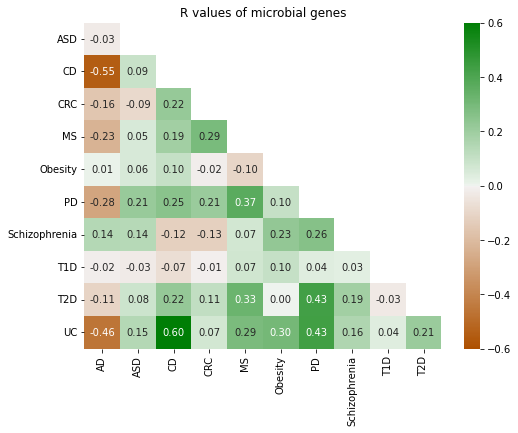

In [4]:
plt.figure(figsize=(8, 6))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
# test = test.drop(columns=test.columns[-1])
cmap = sns.diverging_palette(32, 132, s=120, l=45, as_cmap=True)
sns.heatmap(df, annot=True, fmt=".2f", vmin=-0.6, vmax=0.6,cmap=cmap) 
plt.xlabel("")
plt.ylabel("")
plt.title('R values of microbial genes')
plt.savefig("Figure4_R_values.pdf", bbox_inches='tight')

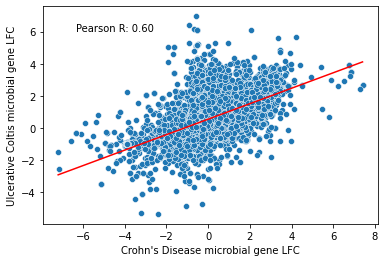

In [44]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

base_path = "../../../../Documents/Meta_disease_Jun/Pydeseq2_genes/"
dataframes_CD = pd.read_csv(base_path + "CD" + "/res_df.tsv", sep='\t', index_col=0)
dataframes_UC = pd.read_csv(base_path + "UC" + "/res_df.tsv", sep='\t', index_col=0)

df_CD = dataframes_CD.dropna(subset=['log2FoldChange'])
df_UC = dataframes_UC.dropna(subset=['log2FoldChange'])
# Find the common indices
common_indices = df_CD.index.intersection(df_UC.index)

# Select the rows with common indices in each DataFrame
df_CD_common = df_CD.loc[common_indices]
df_UC_common = df_UC.loc[common_indices]

# Create a scatter plot
sns.scatterplot(x=df_CD_common['log2FoldChange'].values, y=df_UC_common['log2FoldChange'].values)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df_CD_common['log2FoldChange'].values, df_UC_common['log2FoldChange'].values)

# Add the line of best fit to the plot
sns.lineplot(x=df_CD_common['log2FoldChange'].values, y=slope*df_CD_common['log2FoldChange'].values + intercept, color='red')

# Display the Pearson correlation coefficient (R) on the plot
plt.text(0.1, 0.9, f'Pearson R: {r_value:.2f}', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
plt.xlabel("Crohn's Disease microbial gene LFC")
plt.ylabel('Ulcerative Coltis microbial gene LFC')
# plt.xlim(-8,8)
# plt.ylim(-8,8)

# Display the plot
#plt.show()
plt.savefig("Figure4_CD_UC_scatter.pdf", bbox_inches='tight')

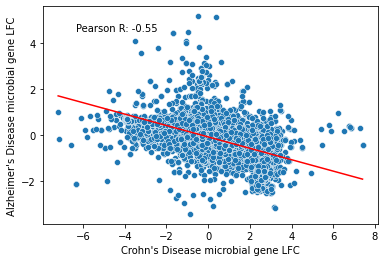

In [45]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

base_path = "../../../../Documents/Meta_disease_Jun/Pydeseq2_genes/"
dataframes_CD = pd.read_csv(base_path + "CD" + "/res_df.tsv", sep='\t', index_col=0)
dataframes_AD = pd.read_csv(base_path + "AD" + "/res_df.tsv", sep='\t', index_col=0)

df_CD = dataframes_CD.dropna(subset=['log2FoldChange'])
df_AD = dataframes_AD.dropna(subset=['log2FoldChange'])
# Find the common indices
common_indices = df_CD.index.intersection(df_AD.index)

# Select the rows with common indices in each DataFrame
df_CD_common = df_CD.loc[common_indices]
df_AD_common = df_AD.loc[common_indices]

# Create a scatter plot
sns.scatterplot(x=df_CD_common['log2FoldChange'].values, y=df_AD_common['log2FoldChange'].values)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df_CD_common['log2FoldChange'].values, df_AD_common['log2FoldChange'].values)

# Add the line of best fit to the plot
sns.lineplot(x=df_CD_common['log2FoldChange'].values, y=slope*df_CD_common['log2FoldChange'].values + intercept, color='red')

# Display the Pearson correlation coefficient (R) on the plot
plt.text(0.1, 0.9, f'Pearson R: {r_value:.2f}', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

# plt.xlim(-8,8)
# plt.ylim(-8,8)
plt.xlabel("Crohn's Disease microbial gene LFC")
plt.ylabel("Alzheimer's Disease microbial gene LFC")

# Display the plot
#plt.show()
plt.savefig("Figure4_CD_AD_scatter.pdf", bbox_inches='tight')